<a href="https://colab.research.google.com/github/mukul27wno/MLnow_2.0/blob/main/MLnow_2_0_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Dataset Download Link](https://www.kaggle.com/spscientist/students-performance-in-exams/download)

***Data created - 13 June 2021***

**Creator -**
MUKUL GOYAL

[Email](mukul27wno@gmail.com)

[Linkedin](www.linkedin.com/in/mukul27wno)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
cd '/content/drive/MyDrive/ML'

/content/drive/MyDrive/ML


In [25]:
ls

exam/  student/  Untitled0.ipynb


In [27]:
cd 'exam/'

/content/drive/My Drive/ML/exam


In [29]:
import os 
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [30]:
ls

MLnow_2.0.ipynb  StudentsPerformance.csv


In [41]:
mathData = pd.read_csv('StudentsPerformance.csv',sep=',') #load the csv file as dataframe
mathData.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [46]:
uniMathData = mathData[['reading score','writing score']]
uniMathData.head(10)

,reading score,writing score
0,72,74
1,90,88
2,95,93
3,57,44
4,78,75
5,83,78
6,95,92
7,43,39
8,64,67
9,60,50


In [49]:
uniMathData.to_csv('uniMathData_Read_Write.csv')


In [50]:
ls

MLnow_2.0.ipynb  StudentsPerformance.csv  uniMathData_Read_Write.csv


## Data visualization

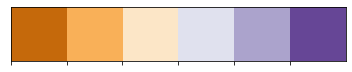

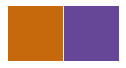

In [51]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [52]:
uniMathData.columns

Index(['reading score', 'writing score'], dtype='object')

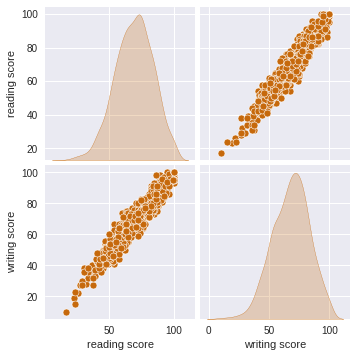

In [53]:
sns.pairplot(uniMathData,
             x_vars = ['reading score', 'writing score'],
             y_vars =  ['reading score', 'writing score'],
       diag_kind='kde'
             )

##Data Splits

In [56]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     reading score  writing score
993             72             74
859             73             72
298             46             50
553             62             64
672             78             76
    reading score  writing score
9              60             50
11             52             43
19             58             61
23             73             73
28             70             65


In [57]:
print(trainDataset.shape)
print(testDataset.shape)

(800, 2)
(200, 2)


In [58]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     reading score  writing score
993             72             74
859             73             72
298             46             50
553             62             64
672             78             76
    reading score  writing score
9              60             50
11             52             43
19             58             61
23             73             73
28             70             65


In [59]:
#removing the writing score column and saving it into the labels variable

trainLabels = trainFeatures.pop('writing score')
testLabels = testFeatures.pop('writing score')

print(trainLabels.head())
print(testLabels.head())

993    74
859    72
298    50
553    64
672    76
Name: writing score, dtype: int64
9     50
11    43
19    61
23    73
28    65
Name: writing score, dtype: int64


In [60]:
print(trainFeatures.head())
print(testFeatures.head())

     reading score
993             72
859             73
298             46
553             62
672             78
    reading score
9              60
11             52
19             58
23             73
28             70


In [65]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [68]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [70]:
numEpochs = 999
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/999
25/25 [==============================] - 0s 3ms/step - loss: 3.6494 - mae: 3.6494 - mse: 20.7299 - val_loss: 3.7075 - val_mae: 3.7075 - val_mse: 21.0740
Epoch 2/999
25/25 [==============================] - 0s 2ms/step - loss: 3.6500 - mae: 3.6500 - mse: 20.7296 - val_loss: 3.7124 - val_mae: 3.7124 - val_mse: 21.0626
Epoch 3/999
25/25 [==============================] - 0s 3ms/step - loss: 3.6471 - mae: 3.6471 - mse: 20.6923 - val_loss: 3.7038 - val_mae: 3.7038 - val_mse: 21.1027
Epoch 4/999
25/25 [==============================] - 0s 2ms/step - loss: 3.6490 - mae: 3.6490 - mse: 20.7697 - val_loss: 3.7038 - val_mae: 3.7038 - val_mse: 21.1004
Epoch 5/999
25/25 [==============================] - 0s 3ms/step - loss: 3.6439 - mae: 3.6439 - mse: 20.6845 - val_loss: 3.7159 - val_mae: 3.7159 - val_mse: 21.0609
Epoch 6/999
25/25 [==============================] - 0s 2ms/step - loss: 3.6452 - mae: 3.6452 - mse: 20.6781 - val_loss: 3.7091 - val_mae: 3.7091 - val_mse: 21.0657
Epoch 7/99

In [72]:
print(history)


In [73]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


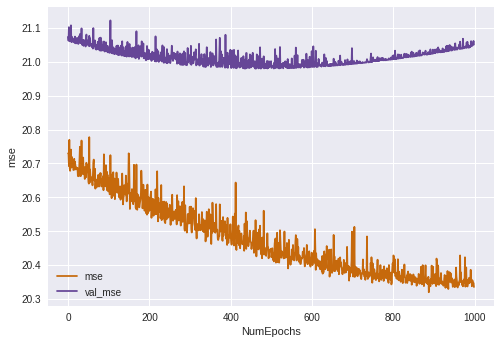

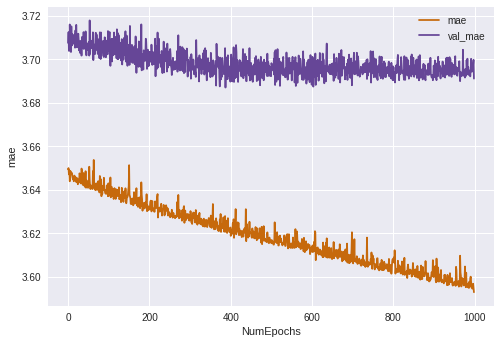

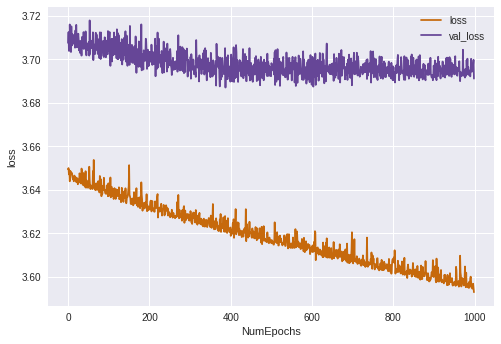

In [74]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [75]:
model.predict([1])

array([[0.29701465]], dtype=float32)

In [76]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[0.29701465]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[0.29701465]
 [1.2899547 ]
 [2.2828948 ]
 [3.2758348 ]
 [4.268775  ]]

List of Predictions (flattened out):
[0.29701465 1.2899547  2.2828948  3.2758348  4.268775  ]



In [77]:
print(testFeatures)

     reading score
9               60
11              52
19              58
23              73
28              70
..             ...
962            100
966             68
976             62
980             24
983             87

[200 rows x 1 columns]


In [78]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [79]:
print(len(testPreds))
print(testPreds)

200
[58.880478 50.93696  56.894596 71.788704 68.80988  70.79576  79.73222
 71.788704 56.894596 63.84518  69.80282  76.7534   53.915775 57.88754
 61.8593   49.944016 47.958138 45.972256 38.028736 81.7181   69.80282
 33.064037 84.69692  79.73222  65.83106  65.83106  75.76046  67.81694
 55.901657 80.72517  82.711044 36.042854 59.873417 42.000496 66.824005
 73.77458  65.83106  68.80988  73.77458  49.944016 75.76046  66.824005
 48.951077 67.81694  50.93696  62.852238 54.90872  79.73222  67.81694
 59.873417 70.79576  48.951077 72.78164  62.852238 71.788704 75.76046
 77.746346 41.007557 74.767525 68.80988  76.7534   61.8593   50.93696
 80.72517  73.77458  71.788704 58.880478 40.014618 65.83106  50.93696
 62.852238 84.69692  51.929897 44.979317 73.77458  66.824005 88.668686
 62.852238 75.76046  71.788704 95.61926  93.633385 47.958138 76.7534
 62.852238 65.83106  61.8593   69.80282  81.7181   83.70398  64.83812
 70.79576  71.788704 80.72517  44.979317 83.70398  63.84518  52.922836
 84.69692  45

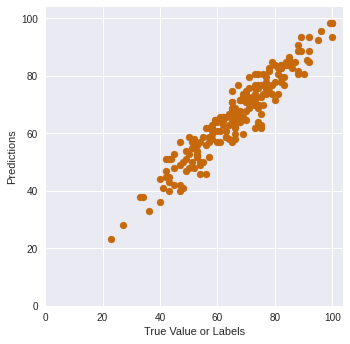

In [80]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

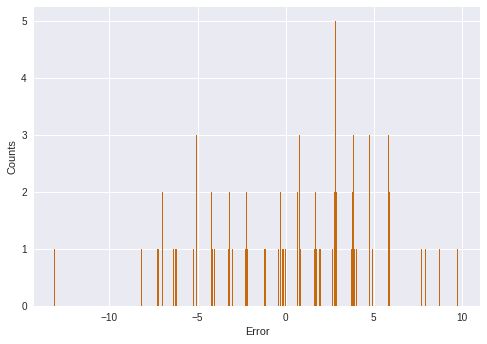

In [81]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)